In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import pickle

RESULTS_DIR = r'linfnorm__2022-1-24_16-3-59'
DIR = os.path.join(os.getcwd(), 'results', RESULTS_DIR)

In [2]:
def plot_results(model_name):
    with open(os.path.join(DIR, 'results_%s.pickle'%(model_name)), 'rb') as F:
        data = pickle.load(F)

    loss0 = np.array(data['initial discriminator data']['history']['loss'])
    loss1 = np.array(data['generator data']['history']['loss'])
    loss2 = np.array(data['discriminator data']['history']['loss'])
    vloss0 = np.array(data['initial discriminator data']['history']['val_loss'])
    vloss1 = np.array(data['generator data']['history']['val_loss'])
    vloss2 = np.array(data['discriminator data']['history']['val_loss'])
    acc0 = np.array(data['initial discriminator data']['history']['accuracy'])
    acc1 = np.array(data['generator data']['history']['accuracy'])
    acc2 = np.array(data['discriminator data']['history']['accuracy'])
    vacc0 = np.array(data['initial discriminator data']['history']['val_accuracy'])
    vacc1 = np.array(data['generator data']['history']['val_accuracy'])
    vacc2 = np.array(data['discriminator data']['history']['val_accuracy'])


    fig = plt.figure()
    ax = plt.gca()
    tax = plt.twinx()
    ax.plot(np.concatenate([loss0, -loss1, loss2]), '--', color='blue', label='Training loss')
    ax.plot(np.concatenate([vloss0, -vloss1, vloss2]), '-', color='blue', label='Validation loss')
    tax.plot(np.concatenate([acc0, acc1, acc2]), '--', color='red', label='Training accuracy')
    tax.plot(np.concatenate([vacc0, vacc1, vacc2]), '-', color='red', label='Validation accuracy')
    ax.axvline(x=loss0.shape[0]-1, linestyle='--', color='black')
    ax.axvline(x=loss0.shape[0]+loss1.shape[0]-1, linestyle='--', color='black')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    tax.set_ylabel('Accuracy')
    tax.set_ylim([0, 1])
    ax.set_title('%s training'%(model_name))
    tax.text(.5*loss0.shape[0]-1, .9, 'Discriminator training',
            horizontalalignment='center', fontsize='small')
    tax.text(loss0.shape[0]+.5*loss1.shape[0]-1, .8, 'Generator training',
            horizontalalignment='center', fontsize='small')
    tax.text(loss0.shape[0]+loss1.shape[0]+.5*loss2.shape[0]-1, .9, 'Discriminator training',
            horizontalalignment='center', fontsize='small')
    ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
    tax.legend(loc='center left', bbox_to_anchor=(1.1, 1.1))

    (fig, ax) = plt.subplots(3, 1, sharex=True, figsize=(48, 16))
    cm0 = data['initial discriminator data']['confusion matrix']
    cm1 = data['generator data']['confusion matrix']
    cm2 = data['discriminator data']['confusion matrix']
    ax[0].imshow(cm0, cmap='plasma', interpolation='none', aspect='equal')
    ax[1].imshow(cm1, cmap='plasma', interpolation='none', aspect='equal')
    img = ax[2].imshow(cm2, cmap='plasma', interpolation='none', aspect='equal')
    ax[0].set_xlabel('Correct attack point')
    ax[1].set_xlabel('Correct attack point')
    ax[2].set_xlabel('Correct attack point')
    ax[0].set_ylabel('Predicted attack point')
    ax[0].set_title('Discriminator trained initially')
    ax[1].set_title('Generator trained')
    ax[2].set_title('Discriminator trained')
    plt.colorbar(img, ax=ax, shrink=.25)
    
    traces = data['traces']
    for key in traces.keys():
        (fig, ax) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
        ax[0].plot(traces[key]['original trace'], '.', color='blue', markersize=.5)
        ax[0].set_title('Original trace')
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        ax[1].plot(traces[key]['visible trace'], '.', color='blue', markersize=.5)
        ax[1].set_title('Visible trace')
        ax[1].set_xlabel('Time')
        ax[2].plot(traces[key]['visible trace']-traces[key]['original trace'], '.', color='blue', markersize=.5)
        ax[2].set_xlabel('Time')
        ax[2].set_title('Difference')
        plt.tight_layout()

Identity generator -- as control experiment.

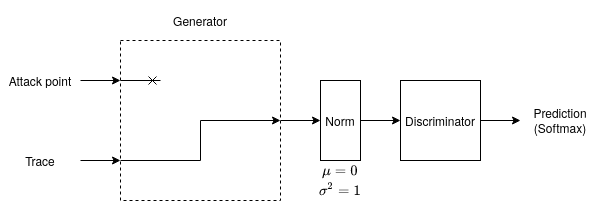

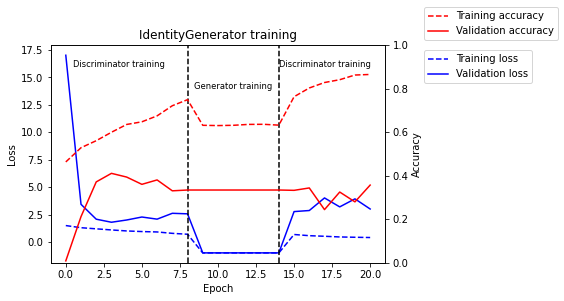

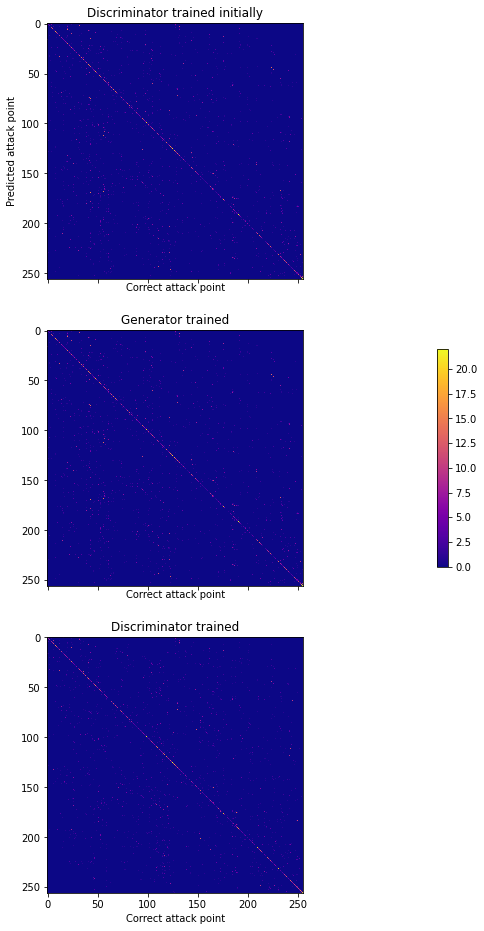

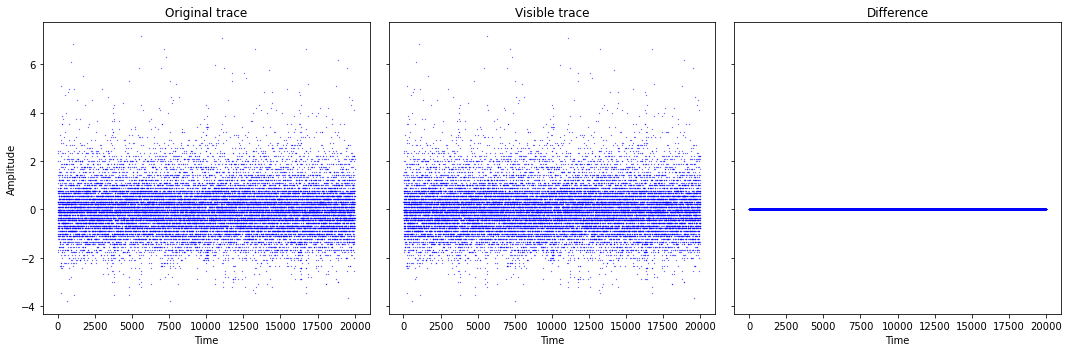

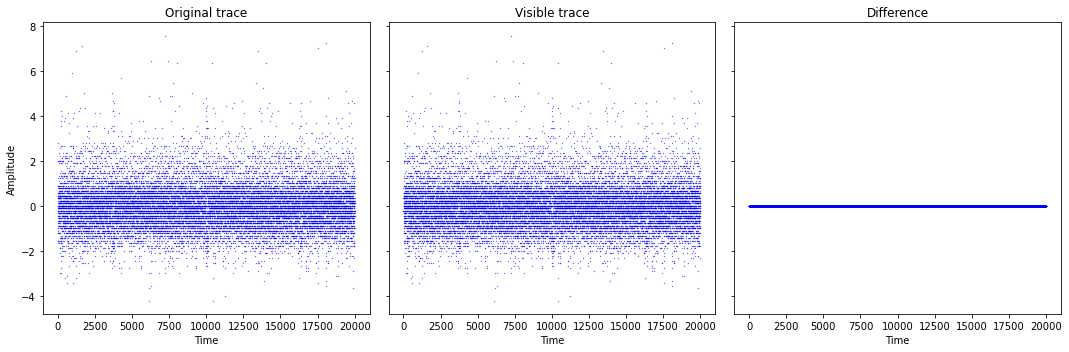

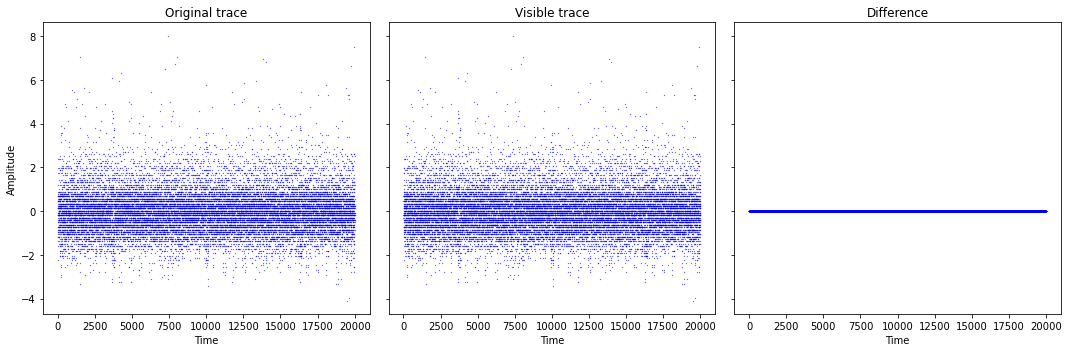

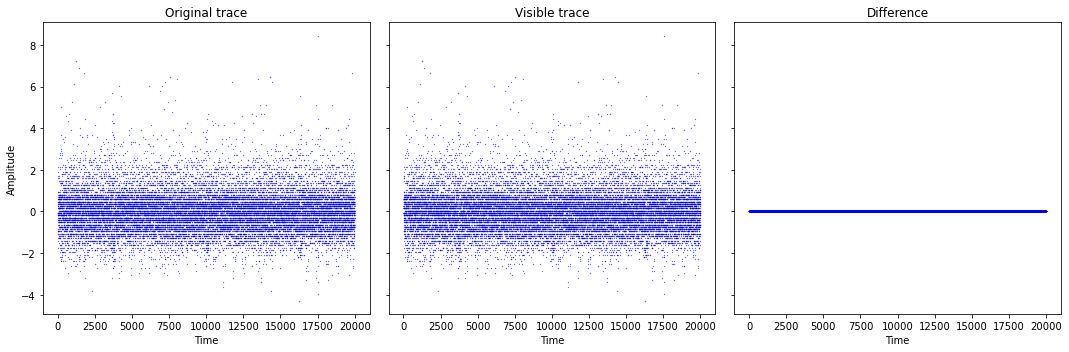

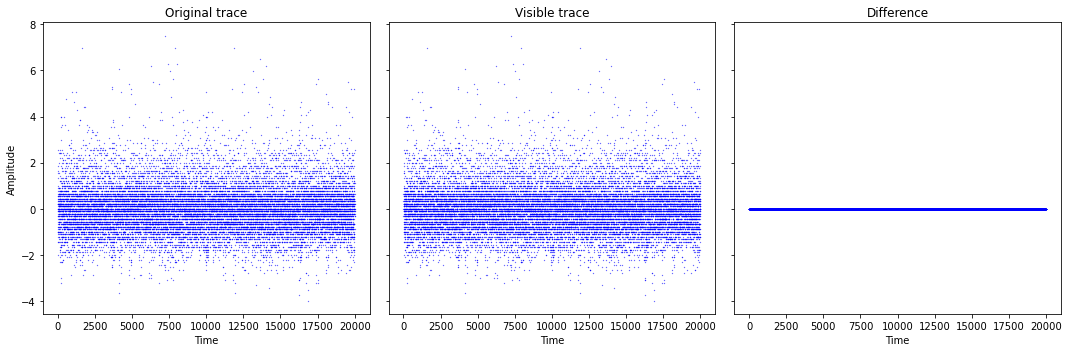

In [3]:
plot_results('IdentityGenerator')

Linear generator

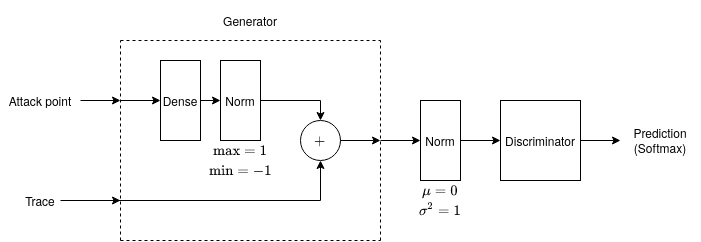

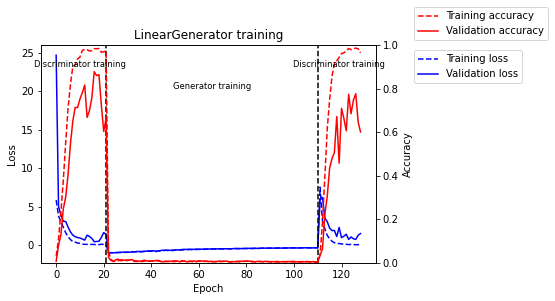

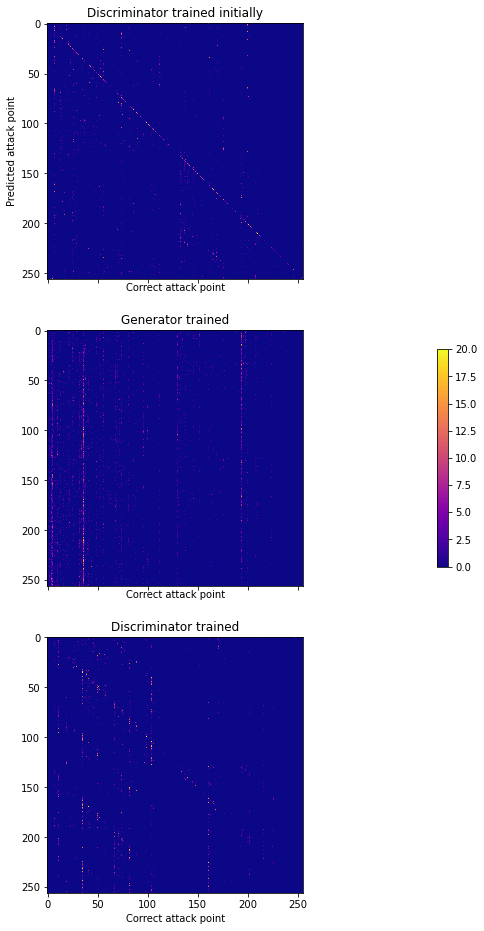

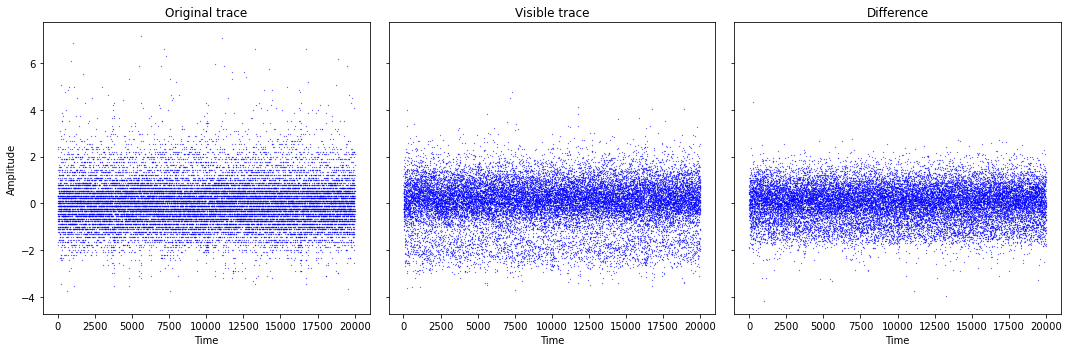

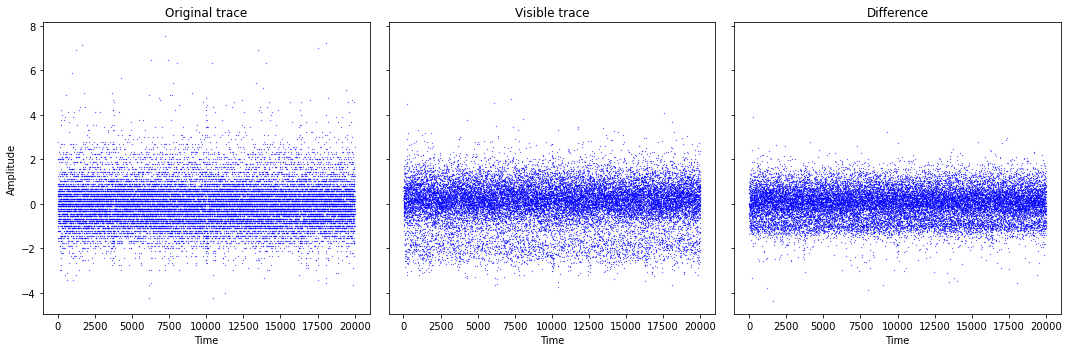

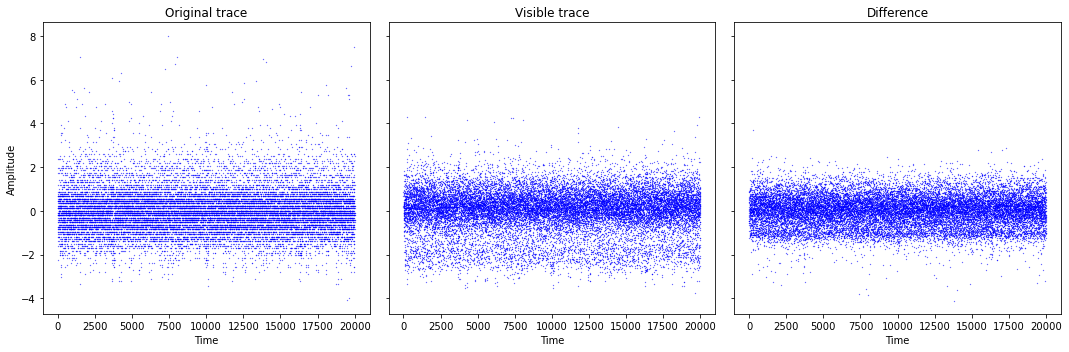

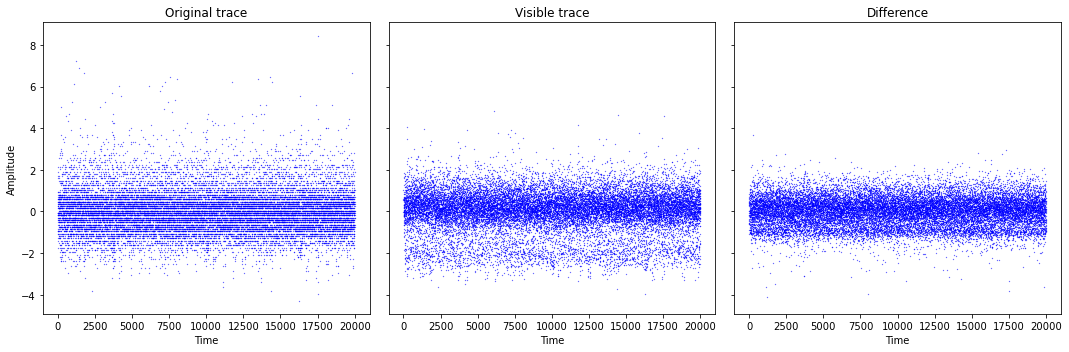

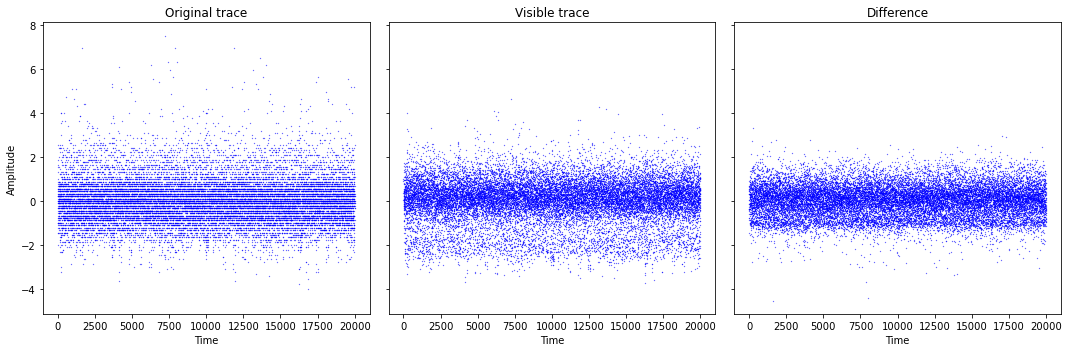

In [4]:
plot_results('LinearGenerator')

1-layer perceptron

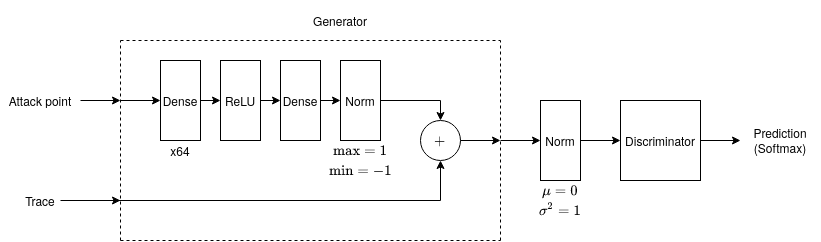

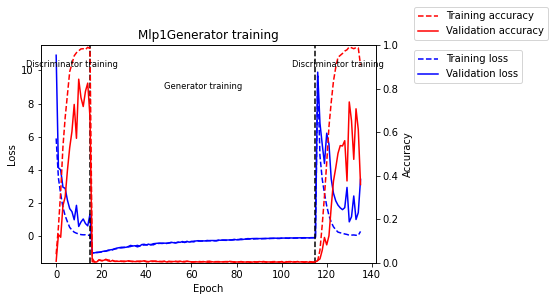

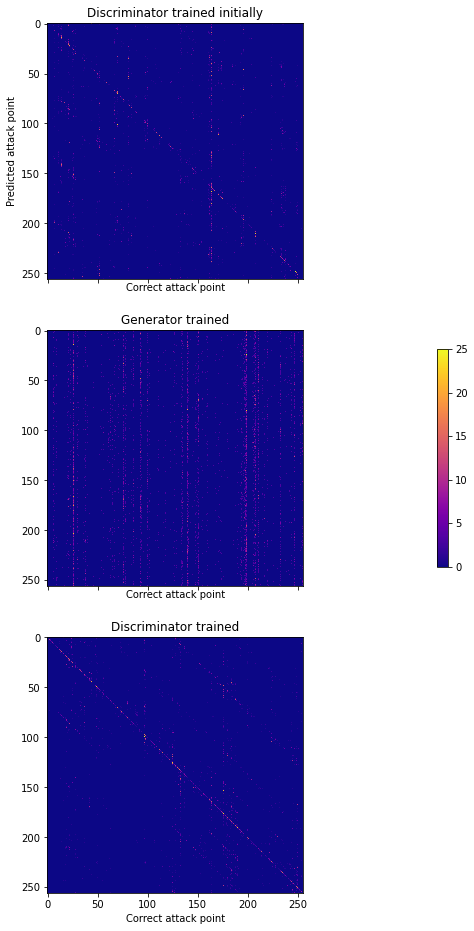

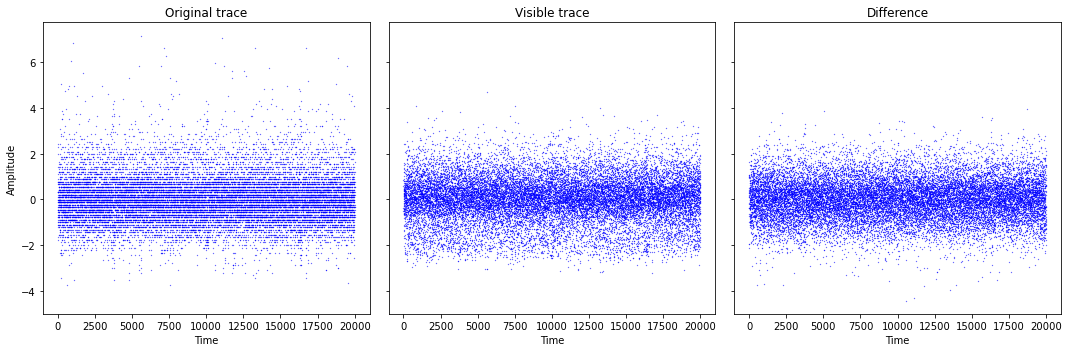

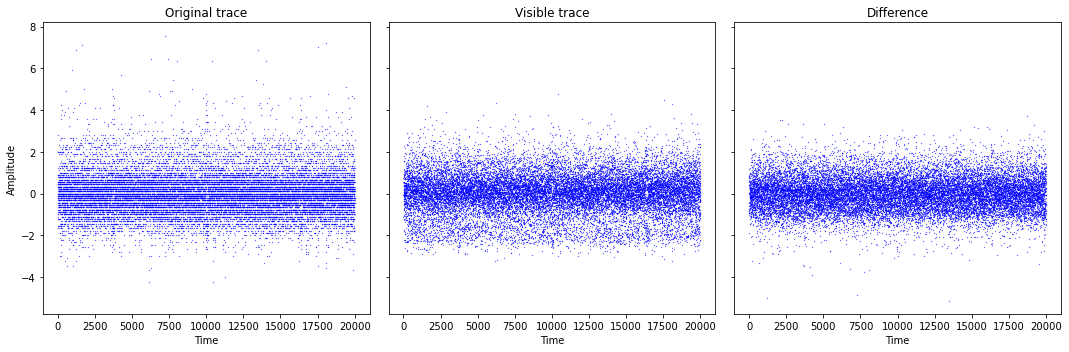

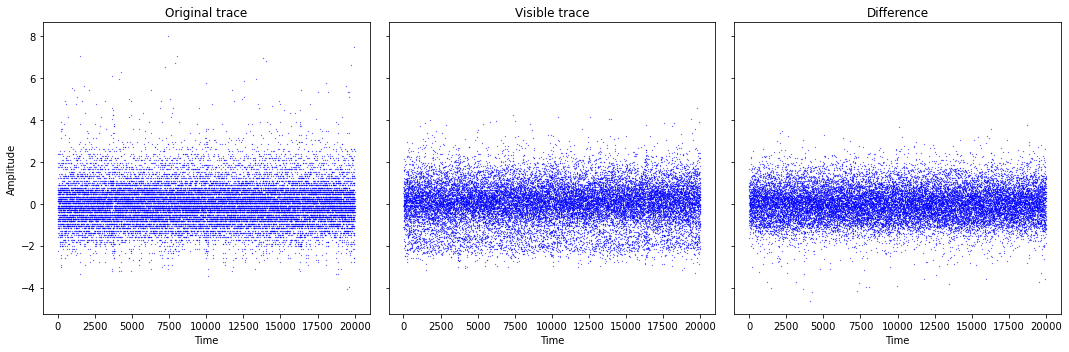

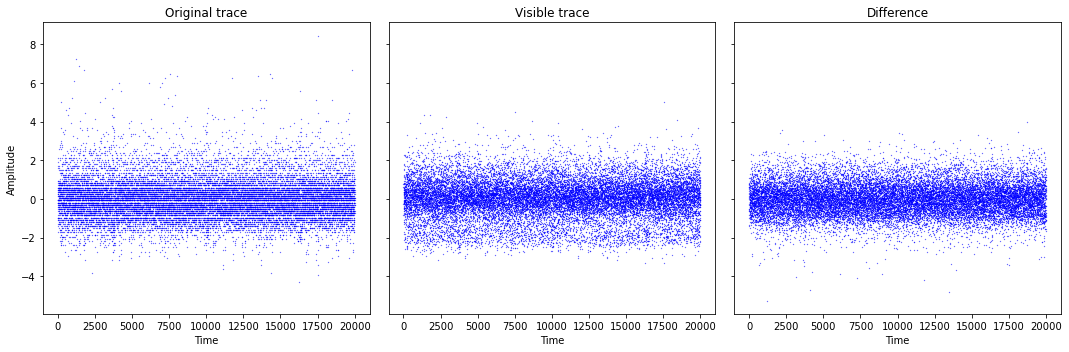

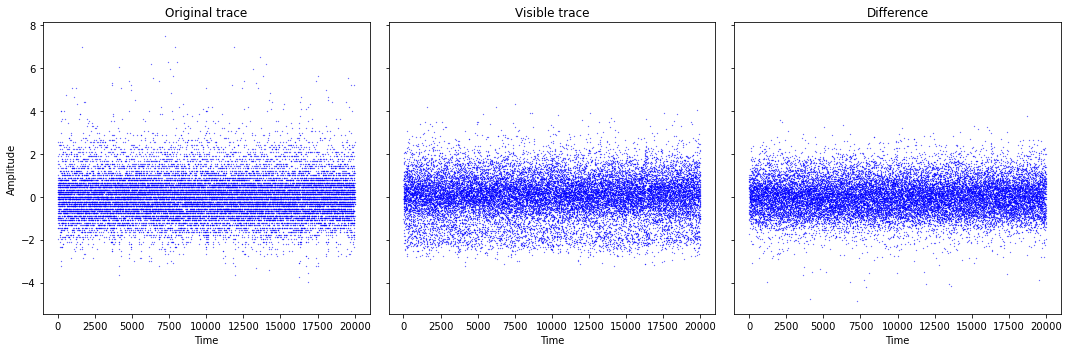

In [5]:
plot_results('Mlp1Generator')

3-layer multilayer perceptron

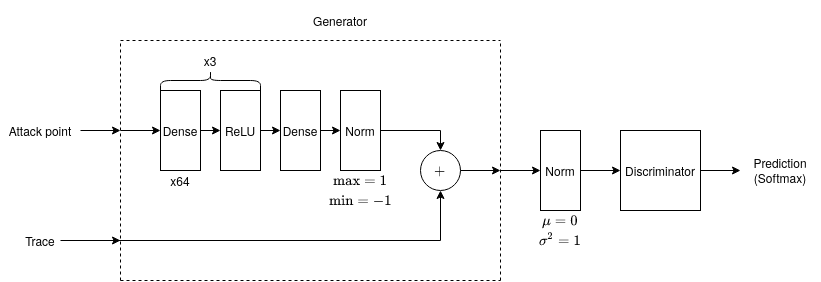

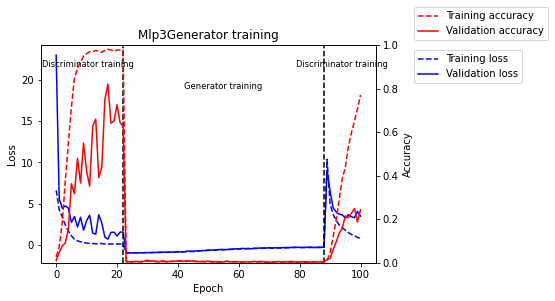

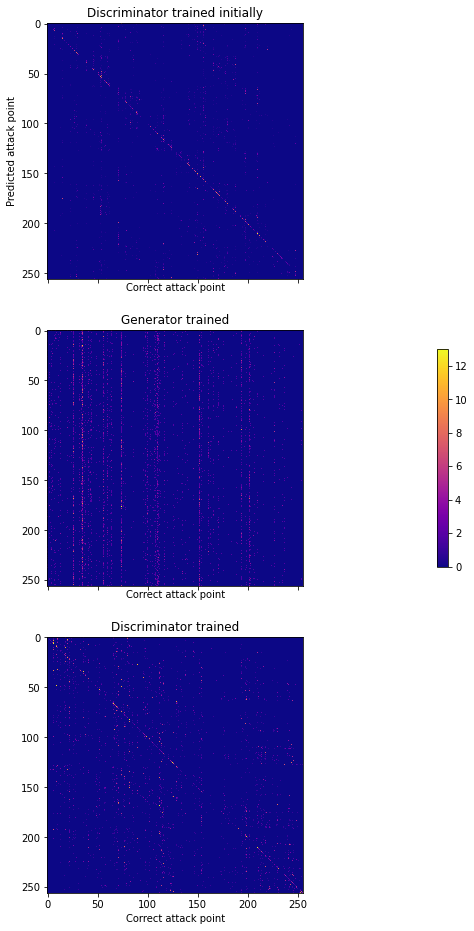

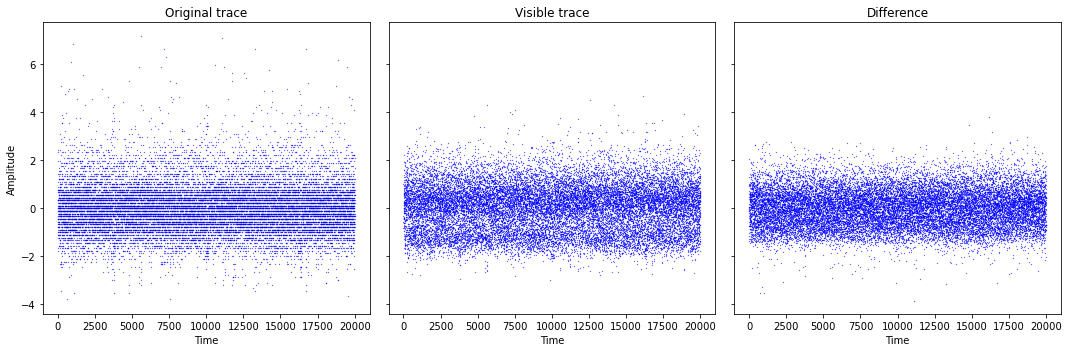

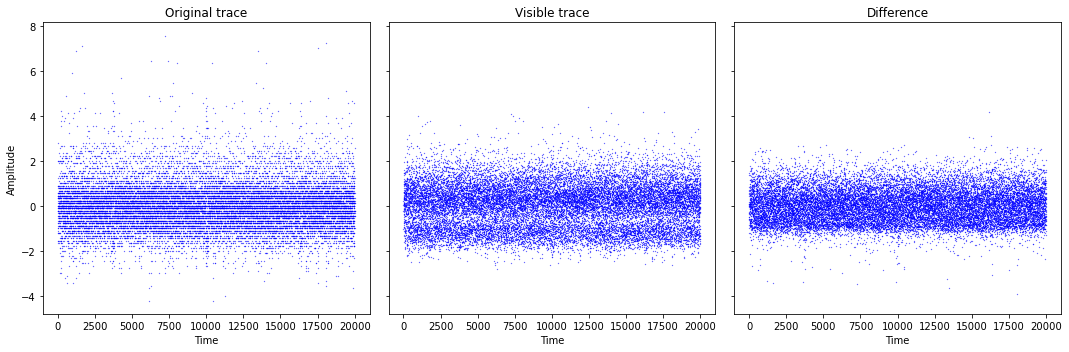

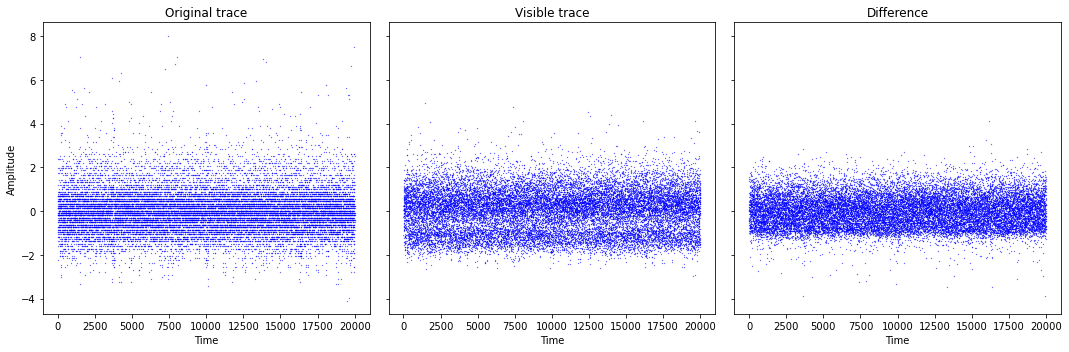

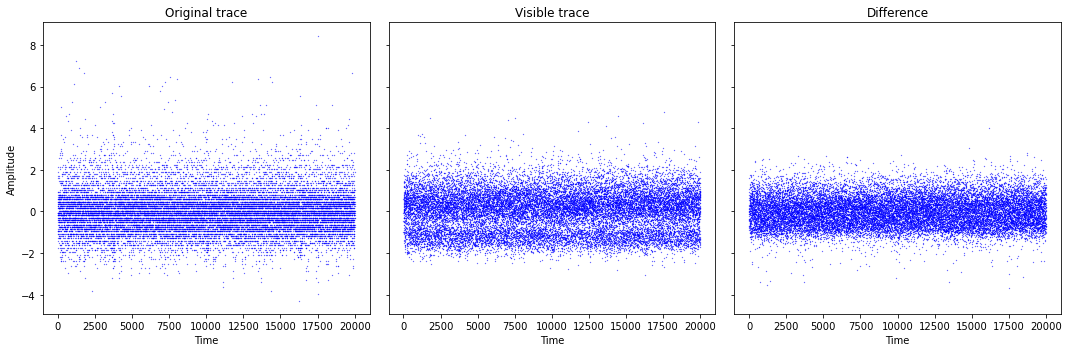

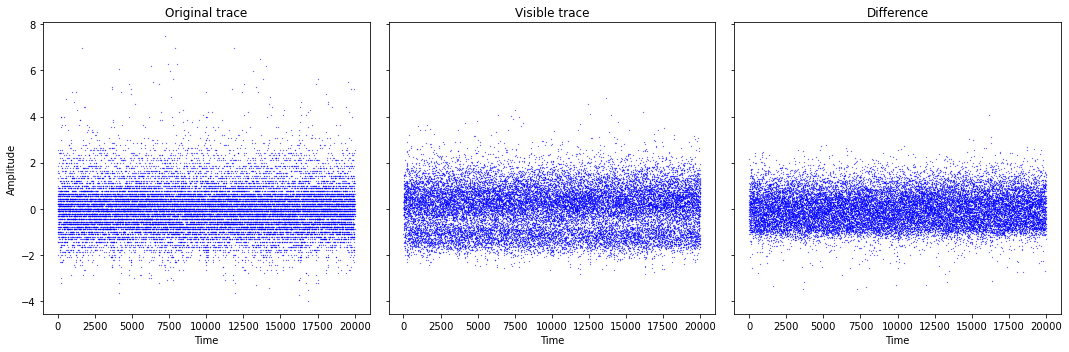

In [6]:
plot_results('Mlp3Generator')

Generator which uses CNN Transpose layers with stride>1 to map 8-length AP value to 20,000-length trace

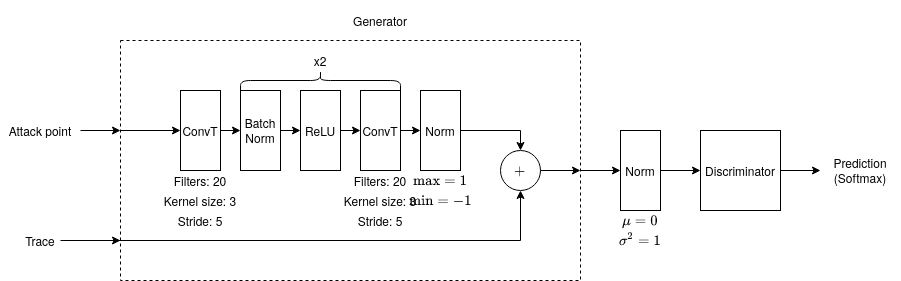

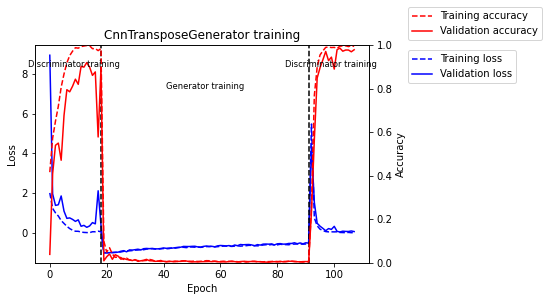

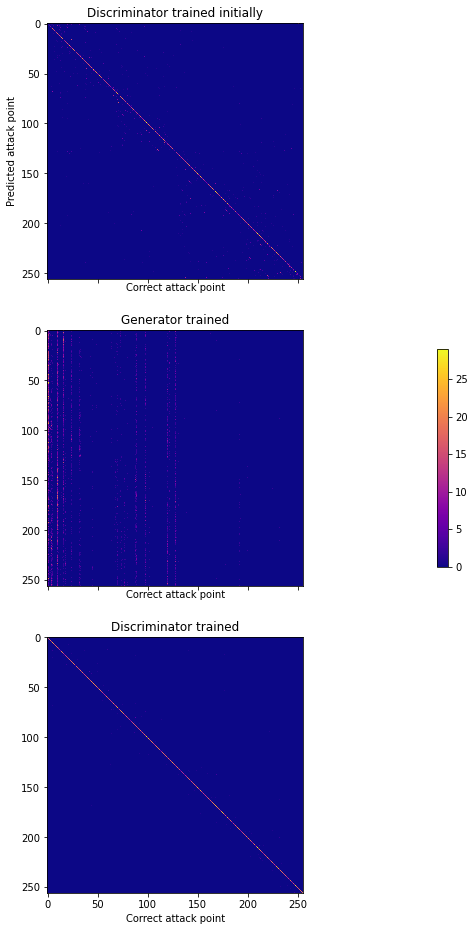

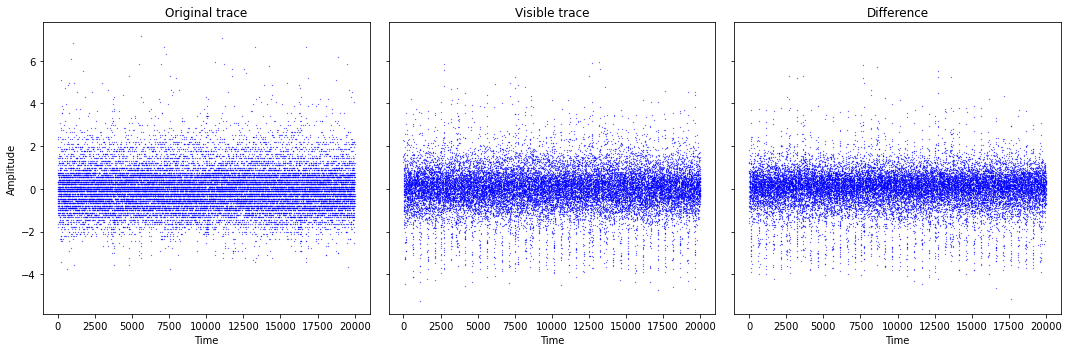

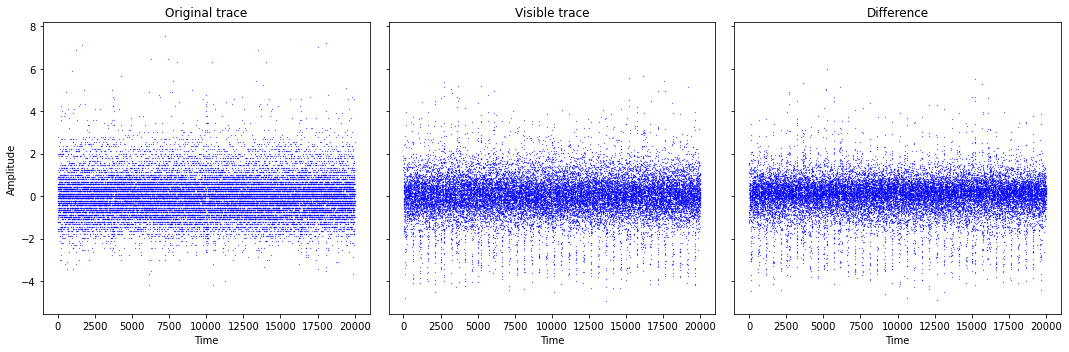

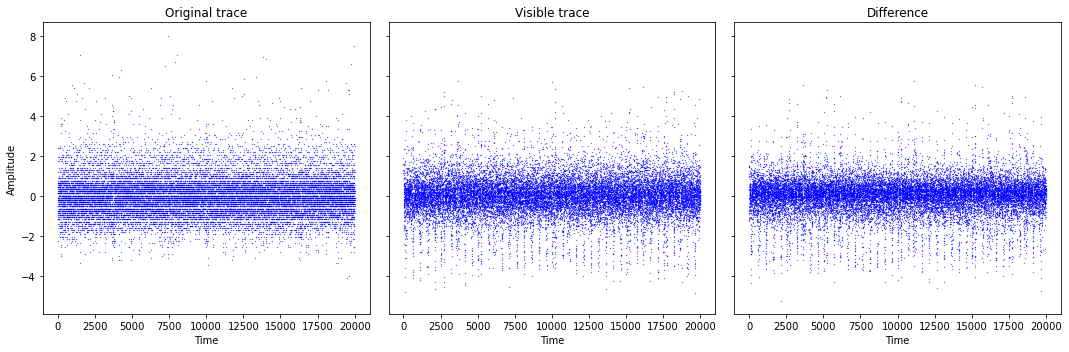

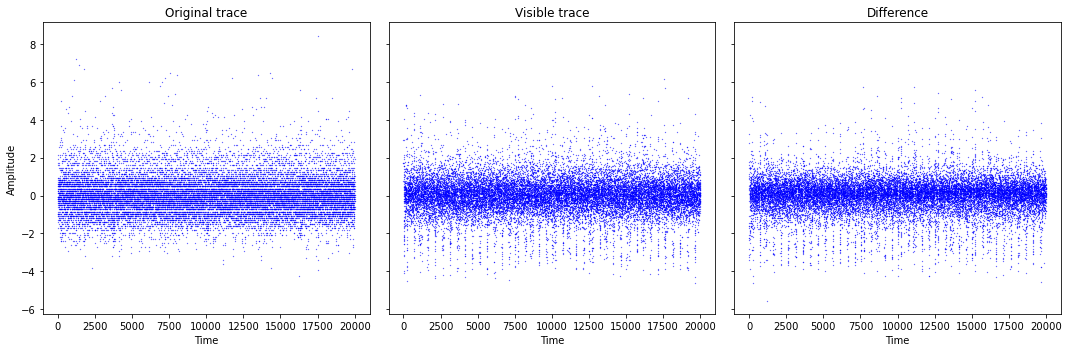

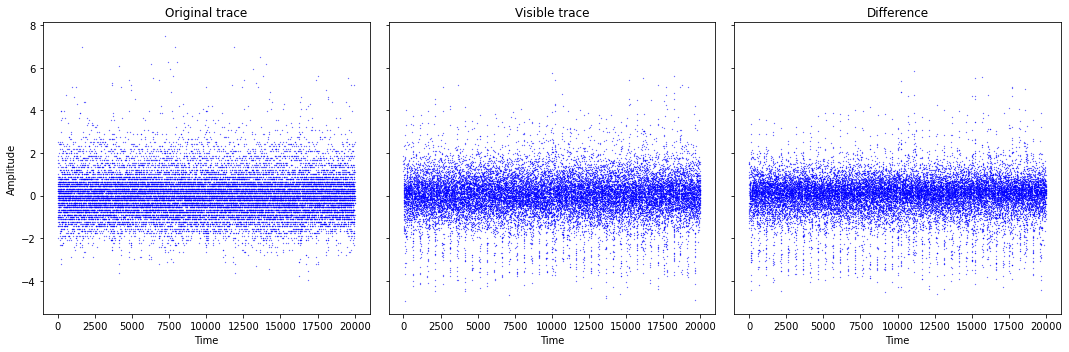

In [7]:
plot_results('CnnTransposeGenerator')

Generator which produces a sum of sinusoids at learned amplitudes/frequencies/phases

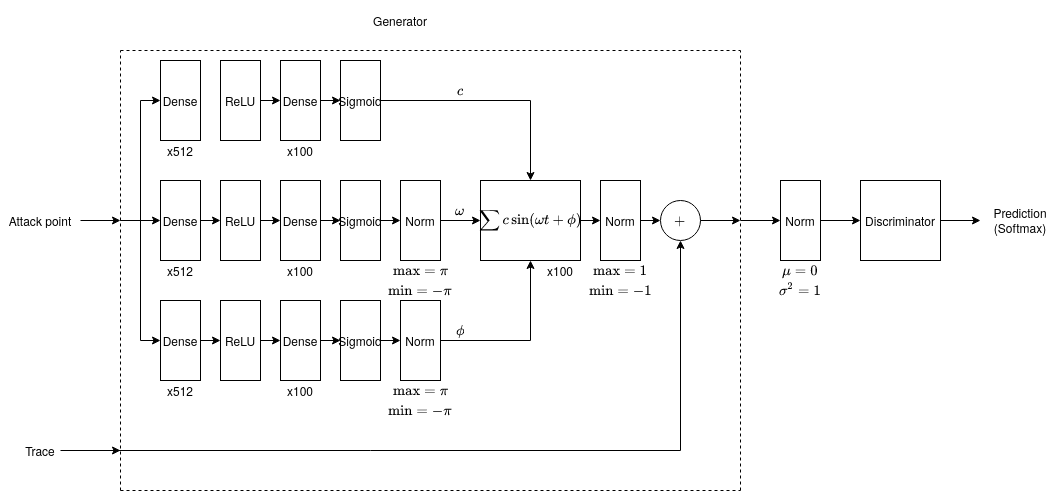

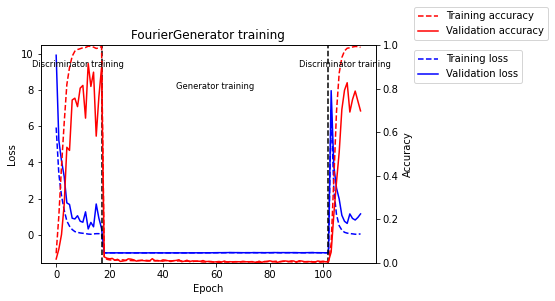

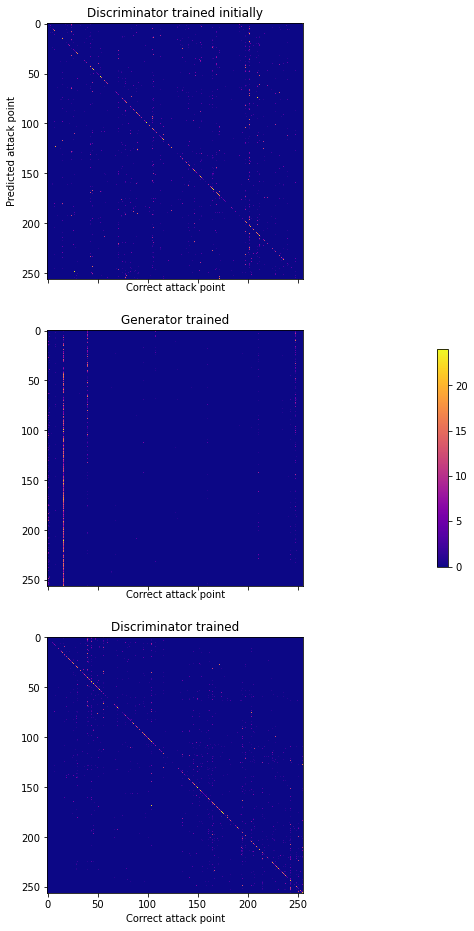

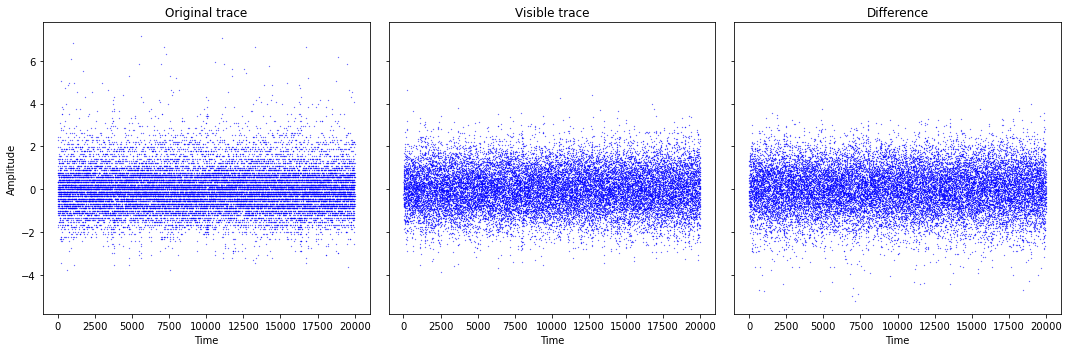

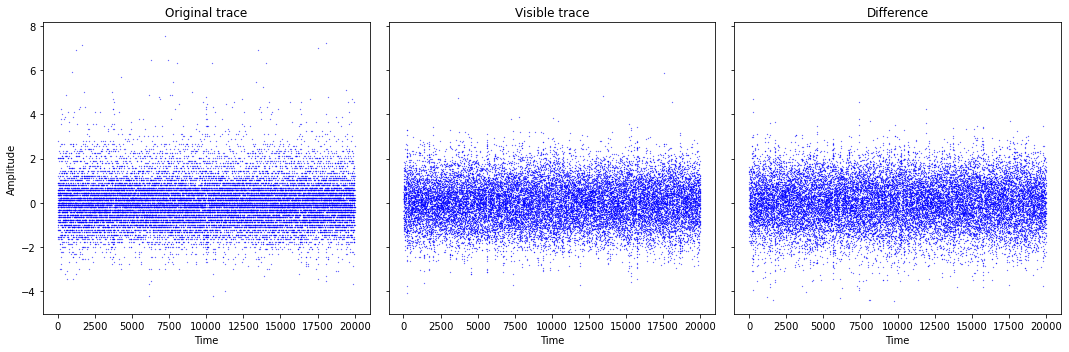

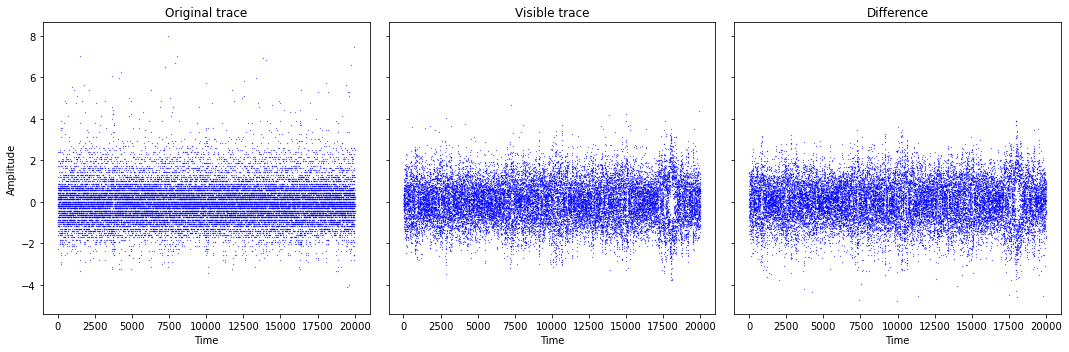

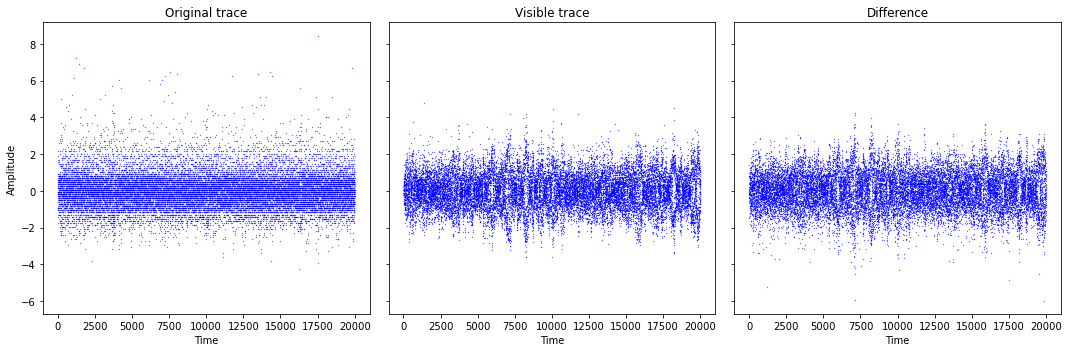

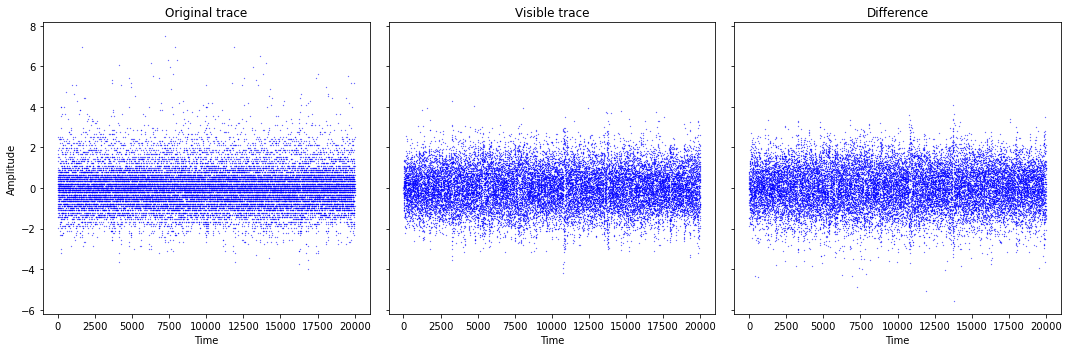

In [8]:
plot_results('FourierGenerator')